In [ ]:
import warnings
import pandas as pd
from tqdm import tqdm

from helpers import classification as pf
from helpers import stats as bf
from helpers.file import save_file

warnings.filterwarnings("ignore")

In [134]:
league = "spain-laliga"
start_season = 2012
save_pipeline = False
random_state = 0

min_games_played = 10
min_games_played_at = 5

betting_starts_after_n_games = 0

filtered_cols = [
    'home_points_pct', 
    'home_win_pct', 'home_draw_pct', 'home_loss_pct',
    'home_points_pct_last_games',
    # 'home_win_pct_last_games', 'home_draw_pct_last_games', 'home_loss_pct_last_games',
    'home_home_win_pct', 'home_home_draw_pct', 'home_home_loss_pct',
    'home_team_xg', 'home_opp_xg',
    'home_team_score', 'home_opp_score',
    'home_home_team_xg', 'home_home_opp_xg',
    'home_home_team_score', 'home_home_opp_score',
    'away_points_pct', 
    'away_win_pct', 'away_draw_pct', 'away_loss_pct',
    'away_points_pct_last_games',
    # 'away_win_pct_last_games', 'away_draw_pct_last_games', 'away_loss_pct_last_games',
    'away_away_win_pct', 'away_away_draw_pct', 'away_away_loss_pct',
    'away_team_xg', 'away_opp_xg',
    'away_team_score', 'away_opp_score',
    'away_away_opp_xg', 'away_away_team_xg',
    'away_away_opp_score', 'away_away_team_score',
    'home_odds', 'away_odds', 'draw_odds', 
    'home_elo', 'away_elo'
]

filtered_cols=['home_points_pct', 'home_win_pct', 'home_draw_pct', 'home_loss_pct', 'home_points_pct_last_games', 'home_home_win_pct', 'home_home_draw_pct', 'home_home_loss_pct', 'home_team_xg', 'home_opp_xg', 'home_team_score', 'home_opp_score', 'home_home_team_xg', 'home_home_opp_xg', 'home_home_team_score', 'home_home_opp_score', 'away_points_pct', 'away_win_pct', 'away_draw_pct', 'away_loss_pct', 'away_points_pct_last_games', 'away_away_win_pct', 'away_away_draw_pct', 'away_away_loss_pct', 'away_team_xg', 'away_opp_xg', 'away_team_score', 'away_opp_score', 'away_away_opp_xg', 'away_away_team_xg', 'away_away_opp_score', 'away_away_team_score', 'home_odds', 'away_odds', 'draw_odds', 'home_elo', 'away_elo']

filtered_cols.extend([
    "home_ahc_odds",
    "ahc_line",
    "away_ahc_odds",
    "overs_odds",
    "totals_line",
    "unders_odds",
])

selected_models = ["random_forest_default", "svm", "gradient_boosting"]
preprocess = False
min_odds = 2.2
bankroll = 900
strategy = "default"
default_value = 1
default_bankroll_pct = 0.05

plot_threshold = 0

In [126]:
matches, _ = bf.initialize_matches(league, start_season)
display(matches)

Generating teams ELOs...


100%|██████████| 4940/4940 [00:00<00:00, 8614.46it/s]

Successfully generated teams ELOs.


,season,date,week,home_team,home_xg,home_score,away_score,away_xg,away_team,league,...,ahc_line,away_ahc_odds,overs_odds,totals_line,unders_odds,result,ahc_result,totals_result,home_elo,away_elo
0,2012,2012-08-18,1,Celta Vigo,NaN,0,1,NaN,Málaga,spain-laliga,...,0.25,1.80,2.02,2.50,1.88,A,A,U,1500.00,1500.00
1,2012,2012-08-18,1,Mallorca,NaN,2,1,NaN,Espanyol,spain-laliga,...,0.50,1.82,1.97,2.25,1.93,H,A,O,1500.00,1500.00
2,2012,2012-08-18,1,Sevilla,NaN,2,1,NaN,Getafe,spain-laliga,...,0.75,2.00,2.02,2.50,1.88,H,A,O,1500.00,1500.00
3,2012,2012-08-19,1,Athletic Club,NaN,3,5,NaN,Betis,spain-laliga,...,0.75,1.80,1.97,2.50,1.93,A,A,O,1500.00,1500.00
4,2012,2012-08-19,1,Barcelona,NaN,5,1,NaN,Real Sociedad,spain-laliga,...,2.75,1.95,2.05,3.75,1.85,H,H,O,1500.00,1500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,2024,2025-05-24,38,Rayo Vallecano,2.2,0,0,0.6,Mallorca,spain-laliga,...,0.75,2.10,1.80,2.00,2.05,D,A,U,1517.41,1490.94
4936,2024,2025-05-24,38,Real Madrid,2.6,2,0,0.8,Real Sociedad,spain-laliga,...,1.25,1.98,1.80,3.00,2.05,H,H,U,1807.22,1526.85
4937,2024,2025-05-25,38,Athletic Club,1.2,0,3,3.5,Barcelona,spain-laliga,...,-0.25,1.98,1.98,3.00,1.88,A,A,P,1689.06,1819.68
4938,2024,2025-05-25,38,Girona,0.0,0,4,2.7,Atlético Madrid,spain-laliga,...,-0.50,1.98,1.98,3.00,1.88,A,A,O,1518.76,1711.87


In [127]:
data_model = []

for index, game in tqdm(matches.iterrows(), total=len(matches)):
    if pd.isnull(game["home_odds"]):
        continue

    home_stats_dict = bf.get_team_previous_games_stats(
        game["home_team"], game["season"], game["date"], "H", min_games_played, min_games_played_at, matches
    )
    if not home_stats_dict:
        continue

    away_stats_dict = bf.get_team_previous_games_stats(
        game["away_team"], game["season"], game["date"], "A", min_games_played, min_games_played_at, matches
    )
    if not away_stats_dict:
        continue

    game_info_keys = [
        "date",
        "season",
        "home_team",
        "away_team",
        "home_odds",
        "away_odds",
        "draw_odds",
        "result",
        "ahc_result",
        "totals_result",
        "home_score",
        "away_score",
        "home_elo",
        "away_elo",
        "home_ahc_odds",
        "ahc_line",
        "away_ahc_odds",
        "overs_odds",
        "totals_line",
        "unders_odds",
    ]
    game_info_dict = {key: game[key] for key in game_info_keys}

    data_model.append({**home_stats_dict, **away_stats_dict, **game_info_dict})

data_df = pd.DataFrame(data_model)

100%|██████████| 4940/4940 [01:27<00:00, 56.72it/s] 


In [128]:
display(data_df)

,home_points_pct,home_win_pct,home_draw_pct,home_loss_pct,home_points_pct_last_games,home_win_pct_last_games,home_draw_pct_last_games,home_loss_pct_last_games,home_home_win_pct,home_home_draw_pct,...,home_score,away_score,home_elo,away_elo,home_ahc_odds,ahc_line,away_ahc_odds,overs_odds,totals_line,unders_odds
0,0.633333,0.600000,0.100000,0.300000,0.633333,0.6,0.1,0.3,0.600000,0.000000,...,1,2,1527.22,1451.53,2.15,0.75,1.78,1.97,2.50,1.93
1,0.300000,0.200000,0.300000,0.500000,0.300000,0.2,0.3,0.5,0.200000,0.400000,...,0,3,1479.30,1445.86,1.80,0.25,2.10,2.07,2.50,1.82
2,0.600000,0.500000,0.300000,0.200000,0.600000,0.5,0.3,0.2,0.600000,0.200000,...,1,2,1534.66,1467.45,1.85,1.00,2.05,2.02,2.75,1.88
3,0.433333,0.400000,0.100000,0.500000,0.433333,0.4,0.1,0.5,0.400000,0.200000,...,3,2,1468.69,1475.38,2.07,0.25,1.82,1.82,2.50,2.07
4,0.400000,0.400000,0.000000,0.600000,0.400000,0.4,0.0,0.6,0.400000,0.000000,...,5,3,1471.72,1472.98,2.07,0.50,1.82,1.90,2.25,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,0.459459,0.351351,0.324324,0.324324,0.500000,0.4,0.3,0.3,0.333333,0.388889,...,0,0,1517.41,1490.94,1.78,0.75,2.10,1.80,2.00,2.05
3581,0.729730,0.675676,0.162162,0.162162,0.800000,0.8,0.0,0.2,0.833333,0.055556,...,2,0,1807.22,1526.85,1.88,1.25,1.98,1.80,3.00,2.05
3582,0.630631,0.513514,0.351351,0.135135,0.633333,0.5,0.4,0.1,0.611111,0.333333,...,0,3,1689.06,1819.68,1.88,-0.25,1.98,1.98,3.00,1.88
3583,0.369369,0.297297,0.216216,0.486486,0.266667,0.2,0.2,0.6,0.388889,0.166667,...,0,4,1518.76,1711.87,1.88,-0.50,1.98,1.98,3.00,1.88


In [ ]:
last_season = matches.iloc[-1]["season"]

# Train and evaluate model
print("Training and evaluating models throughout the seasons...")
for season in tqdm(range(start_season + 1, last_season + 1)):
    matches, trained_models = pf.simulate_with_classification(
        data_df,
        start_season,
        season,
        filtered_cols,
        random_state=0,
        preprocess=preprocess,
        voting_classifier_models=selected_models
    )

Training and evaluating models throughout the seasons...


100%|██████████| 12/12 [00:48<00:00,  4.07s/it]


In [136]:
feature_importances = trained_models['random_forest_default']['pipeline'].named_steps['model'].feature_importances_
feature_importance_mapping = dict(zip(filtered_cols, feature_importances))

# Sort by importance
sorted_features = sorted(feature_importance_mapping.items(), key=lambda x: x[1], reverse=True)
for feature in sorted_features:
    print(feature)

('away_odds', 0.04377885238040655)
('home_odds', 0.04074856292921922)
('away_elo', 0.03331202301350304)
('home_elo', 0.029774740216489404)
('away_team_xg', 0.02861422043578403)
('home_home_team_xg', 0.028044492118820236)
('home_points_pct', 0.027627466190137367)
('away_points_pct', 0.026869289524438244)
('away_loss_pct', 0.026809779981914757)
('away_opp_xg', 0.026231002898255293)
('away_away_team_xg', 0.025833708041883018)
('home_home_opp_xg', 0.025732115893080224)
('home_draw_pct', 0.025145014522903374)
('home_opp_xg', 0.024904091677102554)
('home_team_xg', 0.02476972988157395)
('home_loss_pct', 0.02474512972043696)
('away_away_opp_xg', 0.02467735261318584)
('ahc_line', 0.02393627716416415)
('away_draw_pct', 0.02345078502522728)
('away_win_pct', 0.023330497863659382)
('away_away_loss_pct', 0.022670802240322793)
('overs_odds', 0.02253097826451951)
('home_home_win_pct', 0.02227410727938985)
('home_home_loss_pct', 0.022214936790968497)
('unders_odds', 0.02204046975049762)
('home_win_pct'

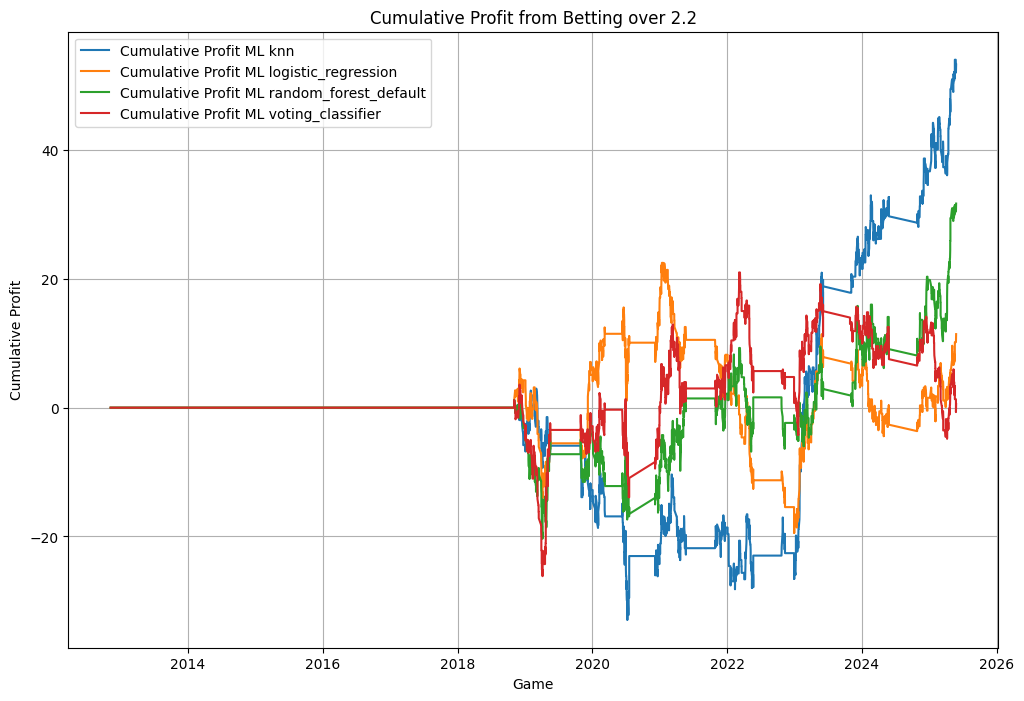

Home method (-85.26/1586): -0.0538
ML method with naive_bayes          --> (   -8.6/902): -0.0095
ML method with knn                  --> (   53.3/729): 0.0731
ML method with logistic_regression  --> (  11.43/662): 0.0173
ML method with svm                  --> ( -26.11/799): -0.0327
ML method with random_forest_default --> (  31.71/749): 0.0423
ML method with random_forest        --> (  -2.09/710): -0.0029
ML method with gradient_boosting    --> ( -30.79/864): -0.0356
ML method with ada_boost            --> ( -65.43/946): -0.0692
ML method with mlp                  --> (-116.17/992): -0.1171
ML method with voting_classifier    --> (   0.57/722): 0.0008

Profit for knn: $53.3
Accuracy for knn: 0.52
Classification Report for knn:
              precision    recall  f1-score   support

           A       0.53      0.45      0.49       538
           D       0.36      0.06      0.11       507
           H       0.53      0.84      0.65       864

    accuracy                           0.52

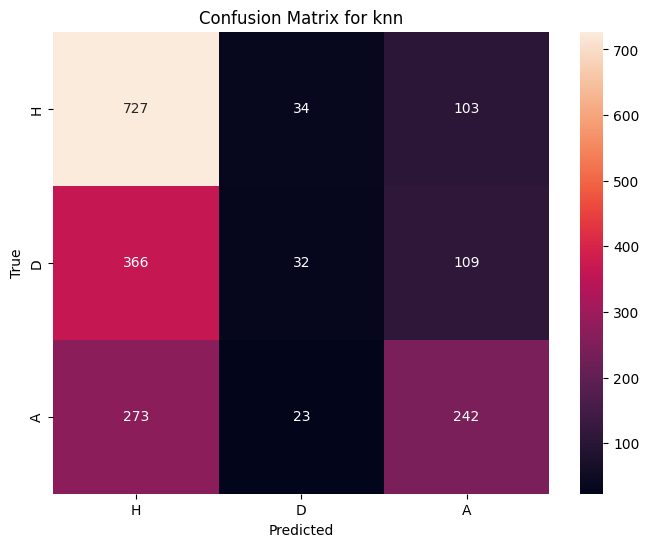

In [ ]:
best_model_name = pf.get_classification_simulation_results(matches, start_season, min_odds, plot_threshold, random_state, bankroll, strategy, default_value, default_bankroll_pct)

In [138]:
matches_filtered = matches[["date",  "season", "home_team", "away_team", "home_score", "away_score", "result", "home_odds", "draw_odds", "away_odds", f"PredictedRes_{best_model_name}", f'ProfitML_{best_model_name}', f'CumulativeProfitML_{best_model_name}']]
matches_filtered = matches_filtered[matches_filtered["season"] == 2024]
matches_filtered.tail(5)

# matches_filtered.to_csv("analysis_predictor.csv")

,date,season,home_team,away_team,home_score,away_score,result,home_odds,draw_odds,away_odds,PredictedRes_knn,ProfitML_knn,CumulativeProfitML_knn
3580,2025-05-24,2024,Rayo Vallecano,Mallorca,0,0,D,1.65,3.70,5.25,H,0.00,52.05
3581,2025-05-24,2024,Real Madrid,Real Sociedad,2,0,H,1.40,4.75,7.00,H,0.00,52.05
3582,2025-05-25,2024,Athletic Club,Barcelona,0,3,A,3.00,3.60,2.25,A,1.25,53.30
3583,2025-05-25,2024,Girona,Atlético Madrid,0,4,A,3.90,3.70,1.91,A,0.00,53.30
3584,2025-05-25,2024,Villarreal,Sevilla,4,2,H,1.60,4.50,4.75,H,0.00,53.30


In [ ]:
my_pipeline = trained_models[best_model_name]["pipeline"]
my_pipeline

data = {
    "pipeline": my_pipeline,
    "best_model_name": best_model_name,
    "min_games_played": min_games_played,
    "min_games_played_at": min_games_played_at,
    "min_odds": min_odds,
    "filtered_cols": filtered_cols,
    "strategy": strategy,
    "default_value": default_value,
    "default_bankroll_pct": default_bankroll_pct
}

# Save the pipeline
if save_pipeline:
    path = f"../dist/betting"
    
    save_file(path, data, league)

: 